In [ ]:
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
df = pd.read_csv('daily-bike-share.csv')
df.head()

--2023-08-01 17:41:30--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.1’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2023-08-01 17:41:31 (4.42 MB/s) - ‘daily-bike-share.csv.1’ saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [ ]:
df["day"]=pd.DatetimeIndex(df['dteday']).day
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [ ]:
numeric_features = ['temp','atemp','hum','windspeed']
df[numeric_features+['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


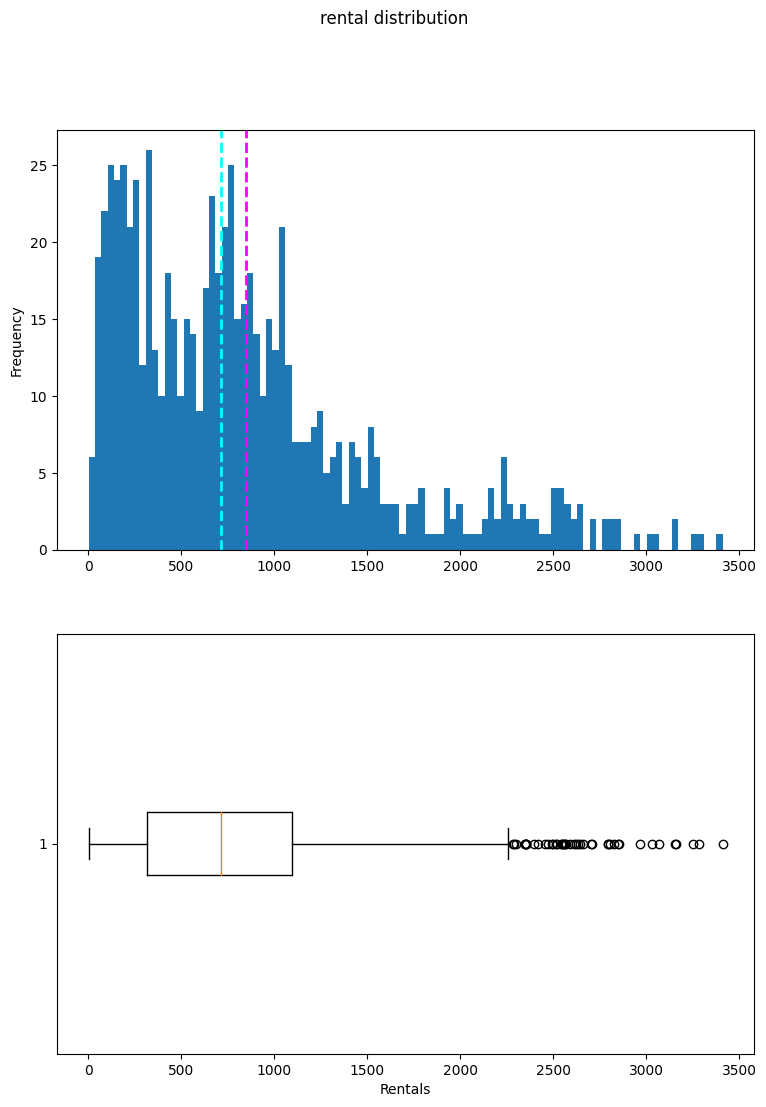

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
label = df['rentals']
fig,ax= plt.subplots(2,1,figsize=(9,12))

ax[0].hist(label,bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(),color='magenta',linestyle='dashed',linewidth=2)
ax[0].axvline(label.median(),color='cyan',linestyle='dashed',linewidth=2)

ax[1].boxplot(label,vert=False)
ax[1].set_xlabel('Rentals')

fig.suptitle('rental distribution')
fig.show()


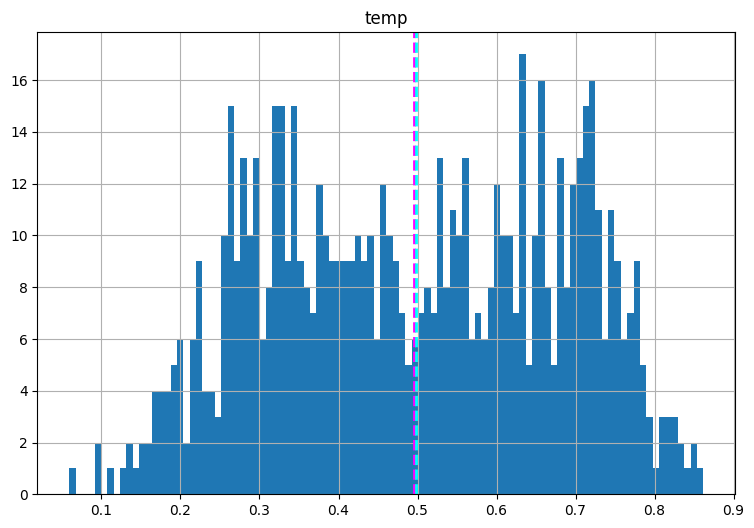

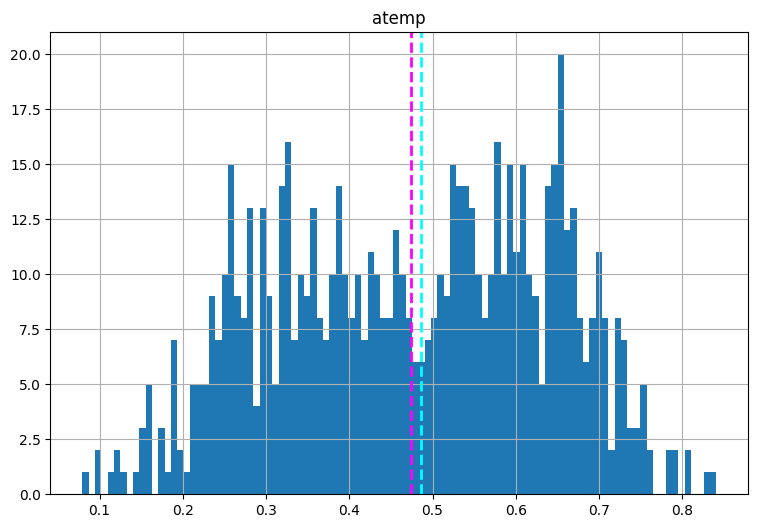

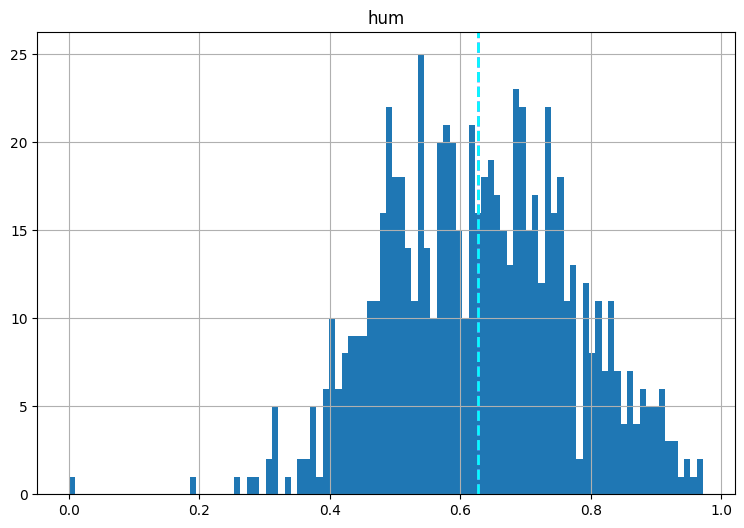

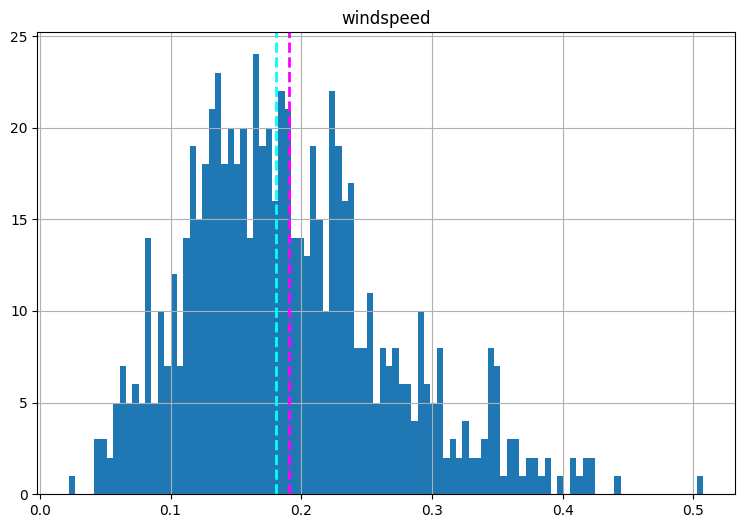

In [ ]:
for col in numeric_features:
  fig = plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = df[col]
  feature.hist(bins=100,ax=ax)
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

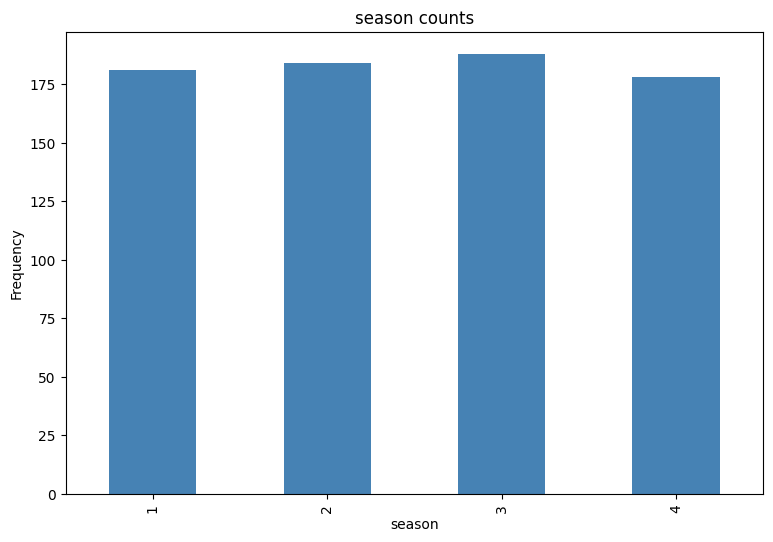

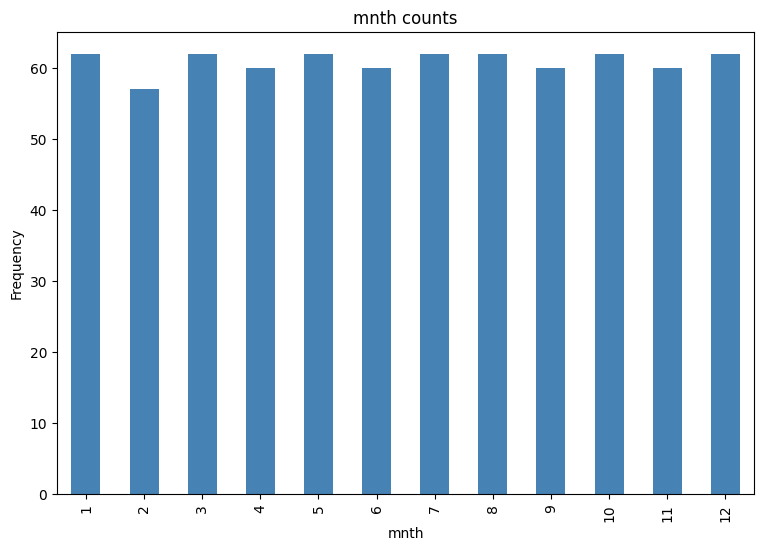

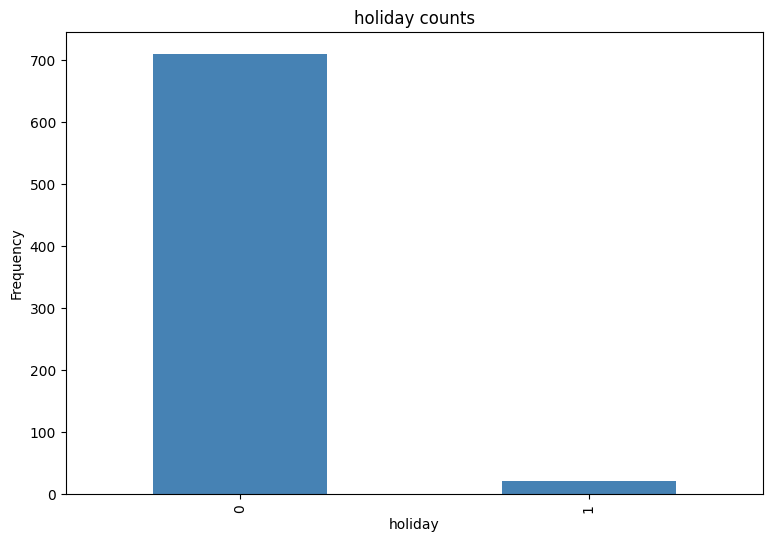

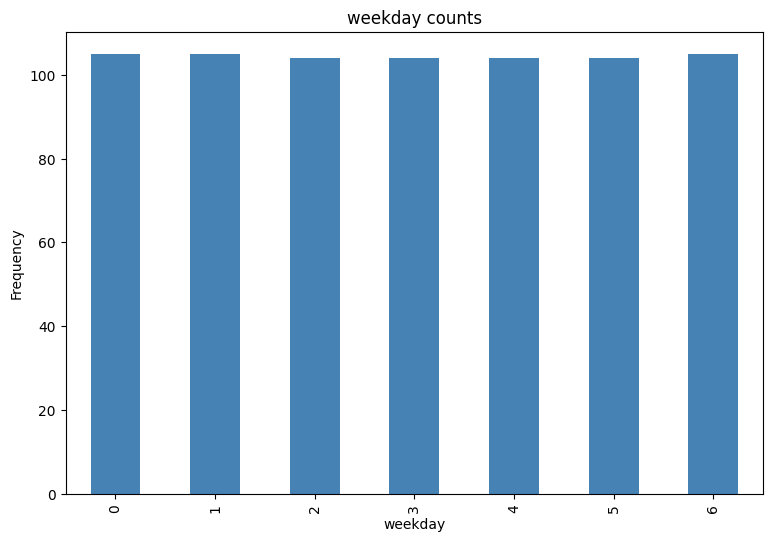

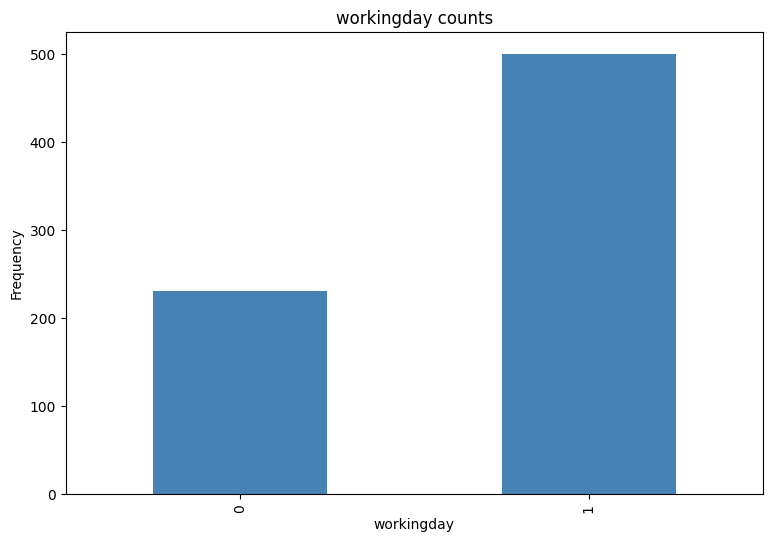

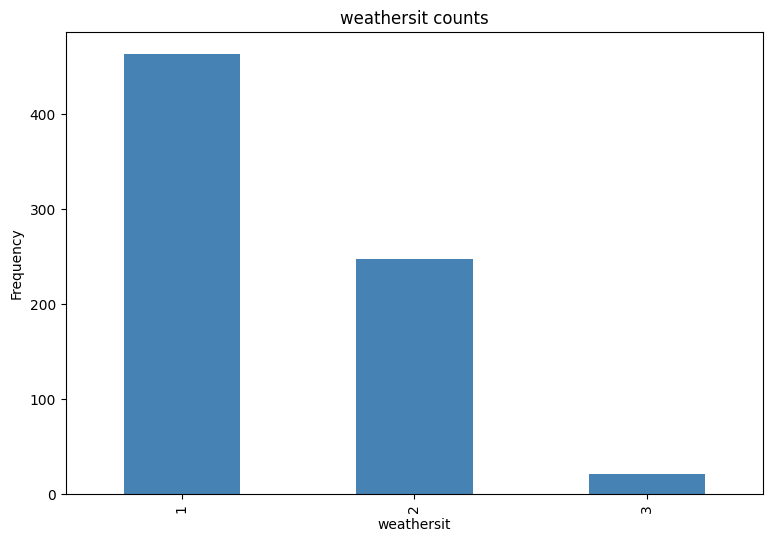

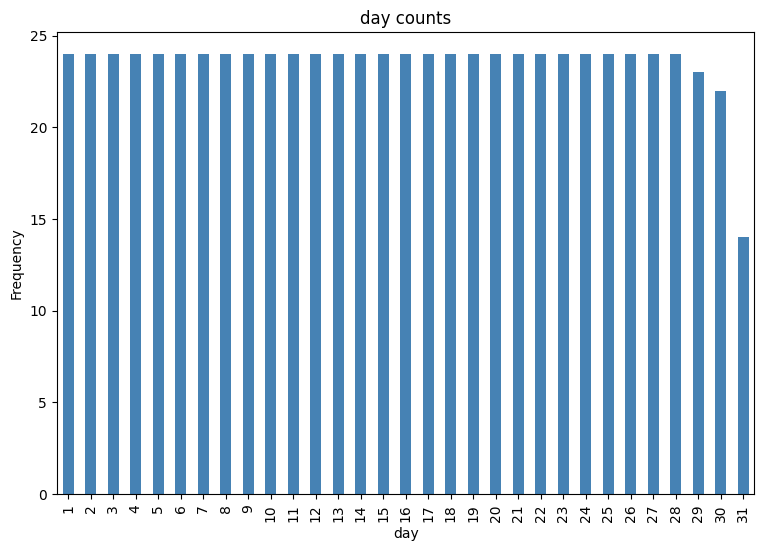

In [ ]:
categorical_features =['season','mnth','holiday','weekday','workingday','weathersit', 'day']
for col in categorical_features:
  counts = df[col].value_counts().sort_index()
  fig = plt.figure(figsize=(9,6))
  ax= fig.gca()
  counts.plot.bar(ax = ax, color='steelblue')
  ax.set_title(col+" counts")
  ax.set_xlabel(col)
  ax.set_ylabel("Frequency")
plt.show()

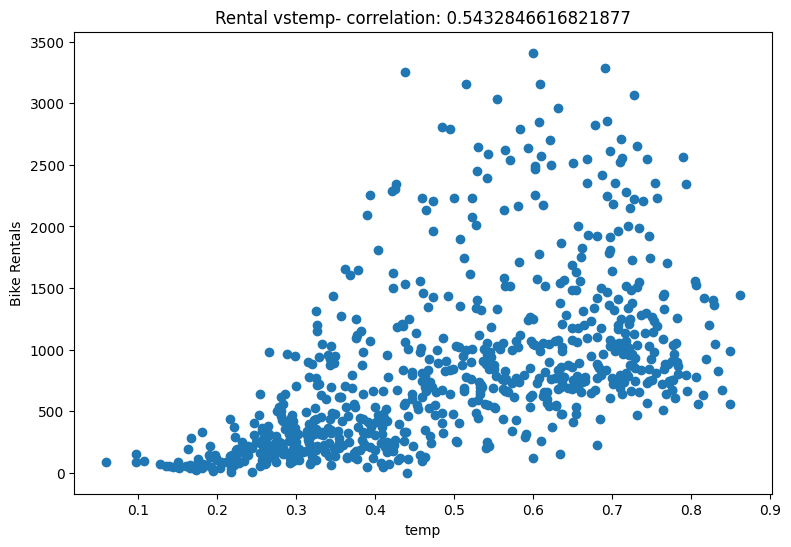

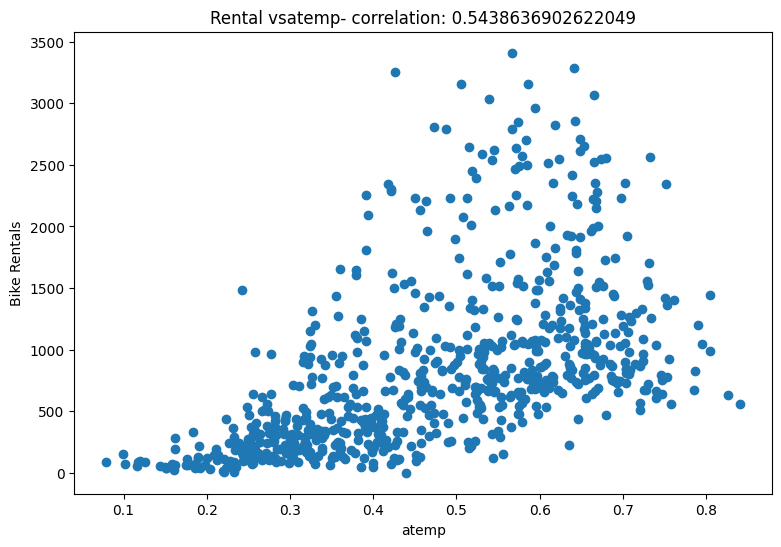

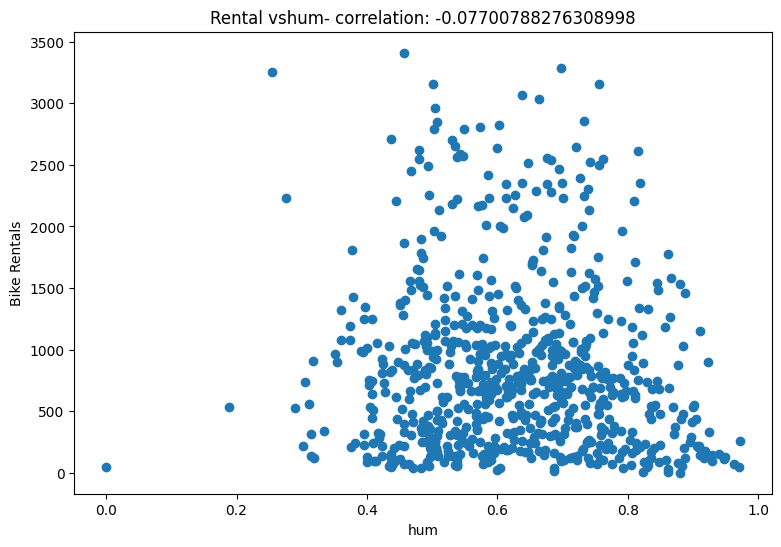

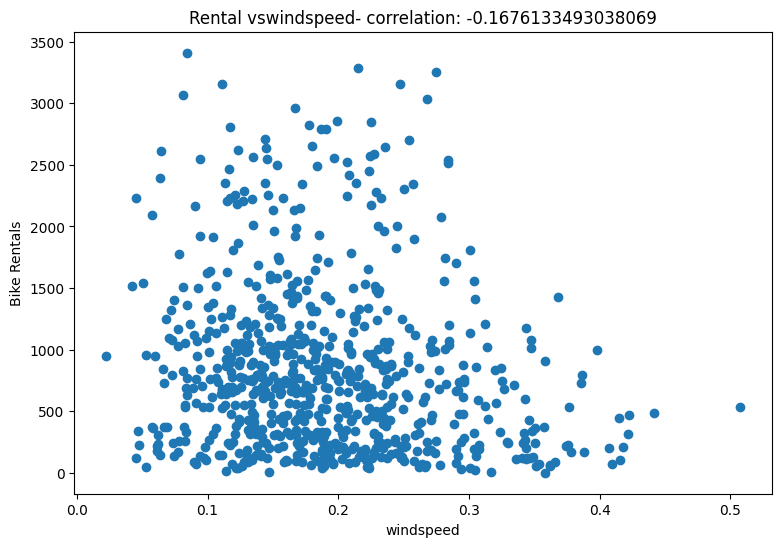

In [ ]:
for col in numeric_features:
  fig = plt.figure(figsize=(9,6))
  ax= fig.gca()
  feature = df[col]
  label = df['rentals']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y= label)
  plt.xlabel(col)
  plt.ylabel('Bike Rentals')
  ax.set_title('Rental vs'+ col+'- correlation: '+ str(correlation))
plt.show()


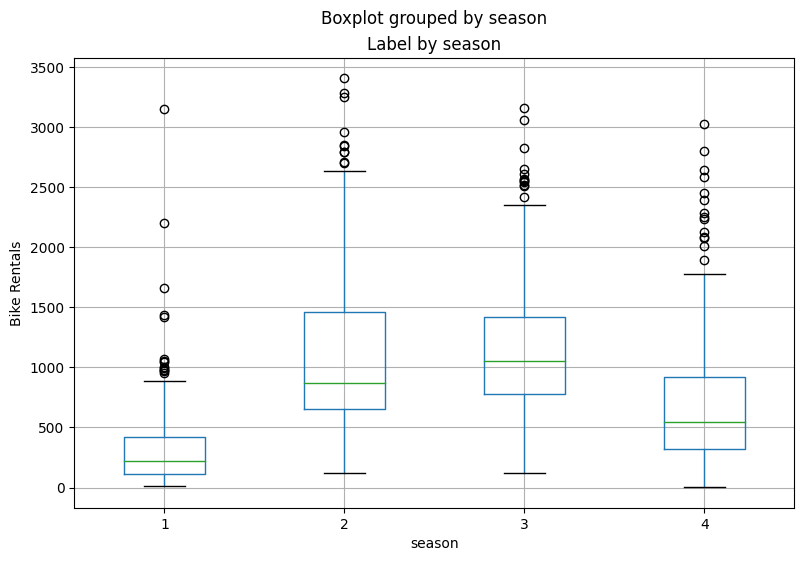

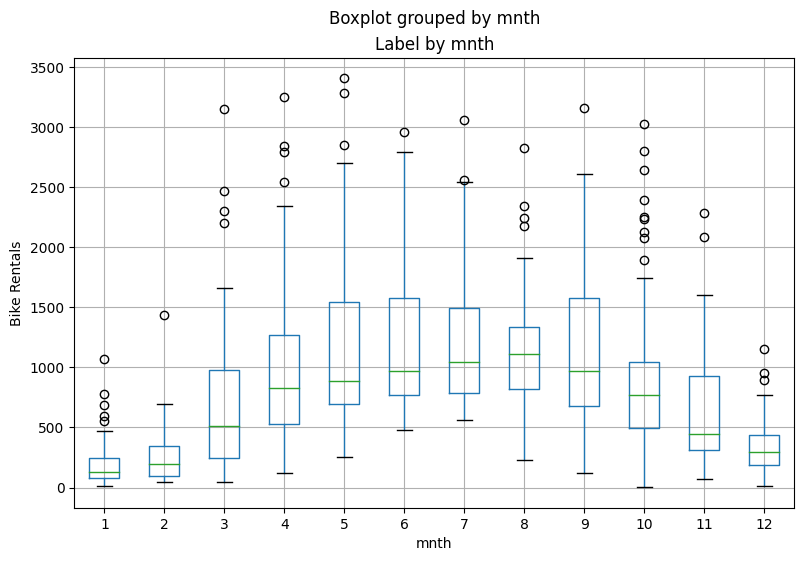

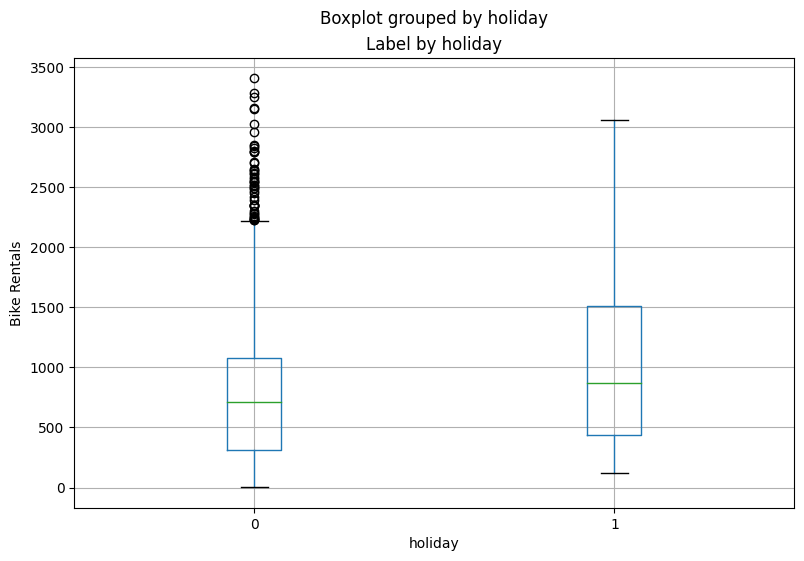

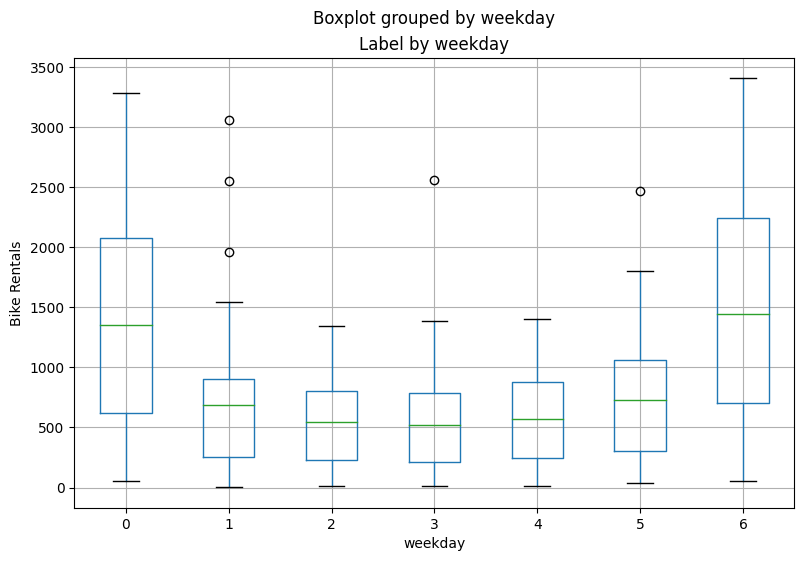

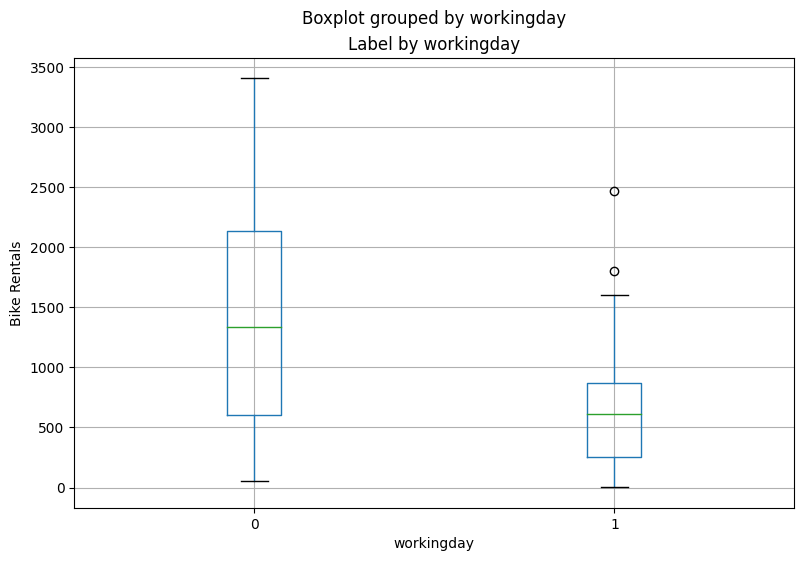

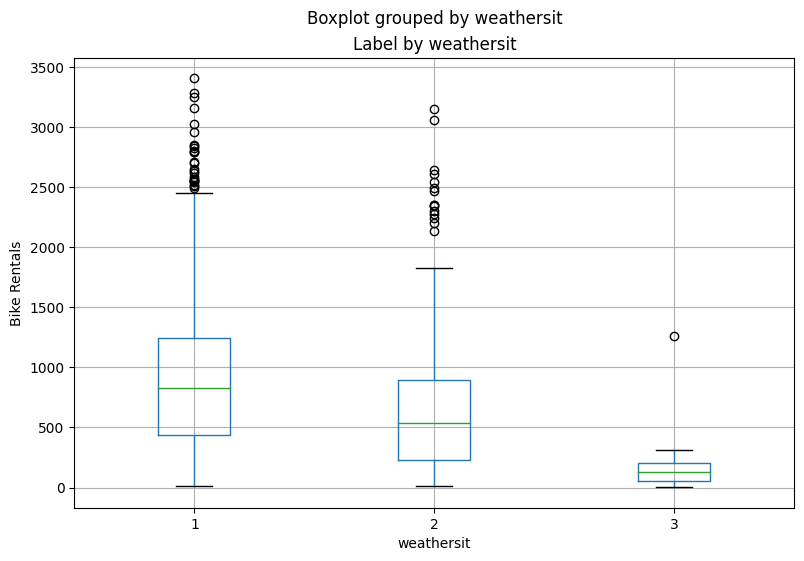

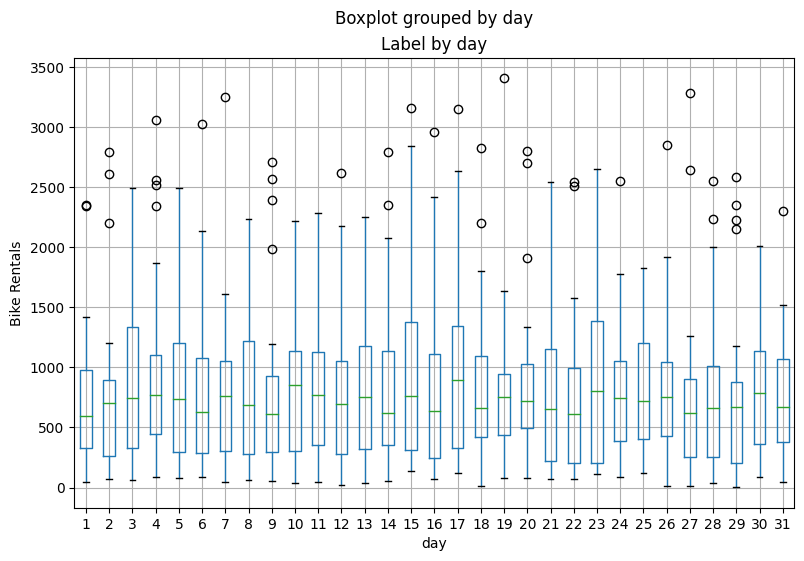

In [ ]:
for col in categorical_features:
  fig =plt.figure(figsize=(9,6))
  ax= fig.gca()
  df.boxplot(column='rentals', by=col,ax=ax)
  ax.set_title('Label by '+col)
  ax.set_ylabel('Bike Rentals')
plt.show()

In [ ]:
# Separate features and labels
X, y = df[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, df['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


# Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


In [ ]:
import numpy as np
pred = model.predict(X_test)
np.set_printoptions(suppress=1)

print('Predicted labels: ', np.round(pred)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


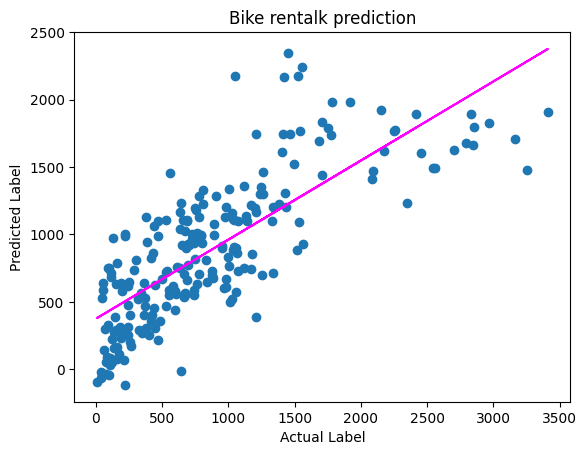

In [ ]:
plt.scatter(y_test,pred)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Bike rentalk prediction')
z=np.polyfit(y_test,pred,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse =mean_squared_error(y_test,pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, pred)
print("R2:", r2)

MSE: 201972.55947035595
RMSE: 449.4135728595165
R2: 0.604045473691919


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso().fit(X_train,y_train)
print(model)

Lasso()


MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.604045473691919


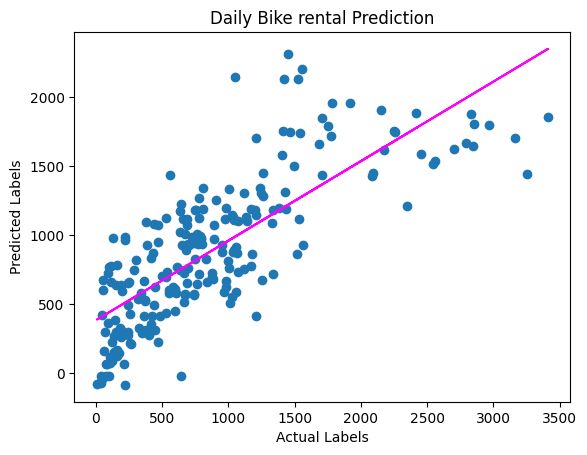

In [ ]:
pred2 =model.predict(X_test)
mse = mean_squared_error(y_test,pred2)
rmse =np.sqrt(mse)
r22= r2_score(y_test,pred2)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

plt.scatter(y_test,pred2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title("Daily Bike rental Prediction")

z=np.polyfit(y_test,pred2,1)
p= np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()


# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
model = DecisionTreeRegressor().fit(X_train, y_train)
print(model)
tree = export_text(model)
print(tree)

MSE: 236683.16818181818
RMSE: 486.5009436597407
R2: 0.604045473691919


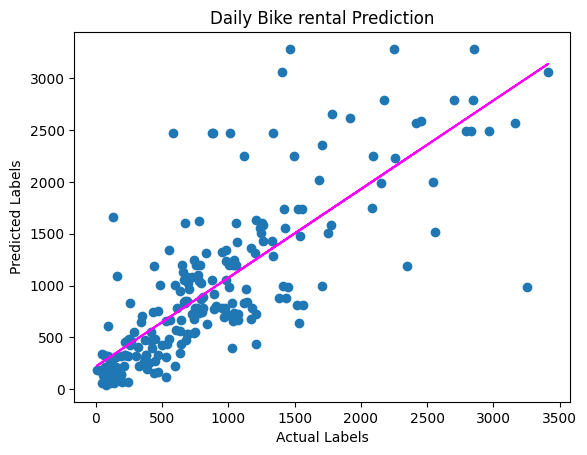

In [ ]:
pred3 =model.predict(X_test)
mse = mean_squared_error(y_test,pred3)
rmse =np.sqrt(mse)
r22= r2_score(y_test,pred3)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

plt.scatter(y_test,pred3)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title("Daily Bike rental Prediction")

z=np.polyfit(y_test,pred3,1)
p= np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()


# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train,y_train)
print(model)

RandomForestRegressor()


MSE: 110701.95622500002
RMSE: 332.7190349604303
R2: 0.604045473691919


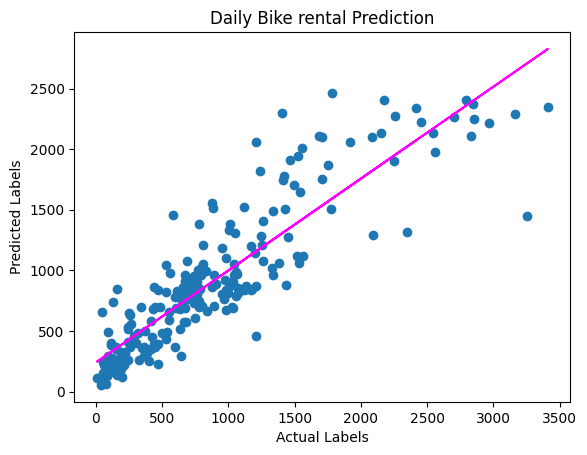

In [ ]:
pred4 =model.predict(X_test)
mse = mean_squared_error(y_test,pred4)
rmse =np.sqrt(mse)
r22= r2_score(y_test,pred4)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

plt.scatter(y_test,pred4)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title("Daily Bike rental Prediction")

z=np.polyfit(y_test,pred4,1)
p= np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()


# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model)

GradientBoostingRegressor()


MSE: 103562.33572442585
RMSE: 321.8110248646336
R2: 0.604045473691919


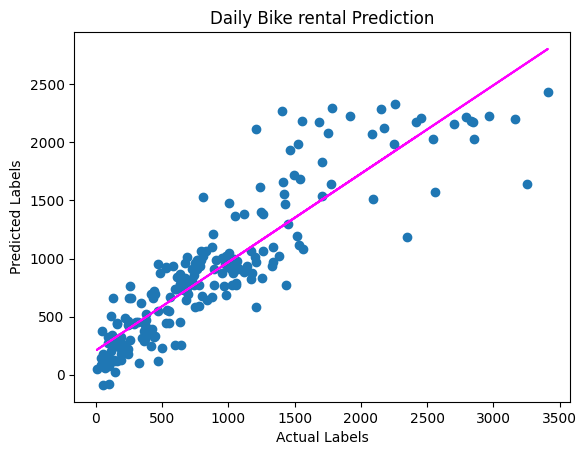

In [ ]:
pred5 =model.predict(X_test)
mse = mean_squared_error(y_test,pred5)
rmse =np.sqrt(mse)
r22= r2_score(y_test,pred5)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

plt.scatter(y_test,pred5)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title("Daily Bike rental Prediction")

z=np.polyfit(y_test,pred5,1)
p= np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()
